# Pandas Practice 3 (Bike Share Data)

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier and use code that has already been implemented, don't call it "copying" but "friendly borrowing" of other people's code. If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!

So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them about how to solve these problems even better.
Here are two good resources for small code snippet which can be very helpful when dealing with DataFrames:

- [Sebastian Raschkas "Things in Pandas I Wish I'd Known Earlier"](https://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Chris Albons set of code snippets](https://chrisalbon.com/)


**By the end of this session you should be able to**
- Explore data with Pandas to answer conceptual questions
- Write chained commands for efficient one-liners



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/bike_share_201402_trip_data.csv')

How many observations are there?

In [4]:
df.describe()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,144015.000000,144015.000000,144015.000000,144015.000000,144015.000000
mean,100967.962129,1230.910141,56.925515,56.943548,437.029407
std,56121.284410,6652.962329,17.372388,17.366134,138.076365
min,4069.000000,60.000000,2.000000,2.000000,9.000000
25%,52138.500000,349.000000,50.000000,49.000000,349.000000
50%,99969.000000,531.000000,61.000000,61.000000,446.000000
75%,150090.500000,797.000000,70.000000,70.000000,546.000000
max,198775.000000,722236.000000,83.000000,83.000000,717.000000


Change the columns to be pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 


In [5]:
# make a copy of your DataFrame
df2 = df.copy()
# make a list column names
cols = df2.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_') for col in cols]
cols = [col.replace('#', 'num') for col in cols]
# reassign new column names to DataFrame
df.columns = cols

In [6]:
df.head()


,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many types of subscription options are there? What are the different subscription types?

In [7]:
df['Subscription_Type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

What is the frequency of each subscription option?

In [8]:
df['Subscription_Type'].value_counts()

Subscription_Type
Subscriber    113647
Customer       30368
Name: count, dtype: int64

Please plot the frequency of each subscription option with a pie chart:

<Axes: ylabel='count'>

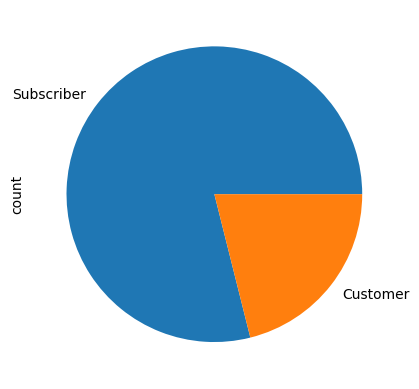

In [9]:
df['Subscription_Type'].value_counts().plot(kind="pie")

Please plot the frequency of each subscription option with a bar chart:

<Axes: xlabel='Subscription_Type'>

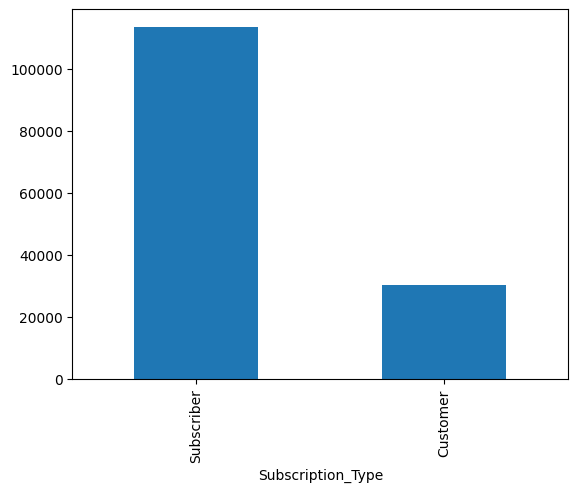

In [10]:
df['Subscription_Type'].value_counts().plot(kind="bar")

Have a look at the start_station column: Which 10 stations occur most frequently?

In [11]:
df['Start_Station'].value_counts().nlargest(10)
#df.sort_values('Start_Station').head() # Note: this is ascending by default.
# df.sort_values('length', ascending=False) # here we change ascending to false.

Start_Station
San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
Name: count, dtype: int64

In [12]:
df['Start_Station'].value_counts()[0:10]

Start_Station
San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
Name: count, dtype: int64

Now look at the end_station column: Which 10 stations occur the least often?

In [13]:
df['End_Station'].value_counts().nsmallest(10)

End_Station
Mezes Park                            5
San Jose Government Center           23
Broadway at Main                     56
Franklin at Maple                    93
San Antonio Shopping Center          93
San Mateo County Center             106
Redwood City Public Library         117
Castro Street and El Camino Real    129
Redwood City Medical Center         178
Broadway St at Battery St           205
Name: count, dtype: int64

Create a table that has start_station segmented by subscription_type and include also the row/column margins (subtotals). If you are not sure how to do it, check out the documentation for `pd.crosstab()`.

In [14]:
pd.crosstab(df['Start_Station'],df['Subscription_Type'],margins = True)

Subscription_Type,Customer,Subscriber,All
Start_Station,,,
2nd at Folsom,427,3349,3776
2nd at South Park,535,3923,4458
2nd at Townsend,882,4105,4987
5th at Howard,606,2029,2635
Adobe on Almaden,75,260,335
...,...,...,...
Townsend at 7th,518,3975,4493
University and Emerson,328,106,434
Washington at Kearney,561,911,1472


Let's look at the duration... Which unit do you think is used here?

How long is the shortest trip? How many are that short?

In [15]:
df.groupby("Duration").count()

,Trip_ID,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
Duration,,,,,,,,,,
60,17,17,17,17,17,17,17,17,17,17
61,11,11,11,11,11,11,11,11,11,11
62,9,9,9,9,9,9,9,9,9,8
63,14,14,14,14,14,14,14,14,14,13
64,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...
429384,1,1,1,1,1,1,1,1,1,1
586356,1,1,1,1,1,1,1,1,1,1
597517,1,1,1,1,1,1,1,1,1,1


In [16]:
groupby_obj = df.groupby('Duration')
groupby_obj.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
...,...,...,...,...,...,...,...,...,...,...,...
143777,198461,74859,2/28/2014 16:29,Embarcadero at Vallejo,48,3/1/2014 13:16,Grant Avenue at Columbus Avenue,73,583,Customer,12603
143784,198469,74556,2/28/2014 16:34,Embarcadero at Vallejo,48,3/1/2014 13:16,Grant Avenue at Columbus Avenue,73,607,Customer,12603
143838,198545,4575,2/28/2014 17:10,Embarcadero at Sansome,60,2/28/2014 18:26,Embarcadero at Sansome,60,622,Customer,10014
143962,198703,164816,2/28/2014 19:05,Grant Avenue at Columbus Avenue,73,3/2/2014 16:52,Grant Avenue at Columbus Avenue,73,319,Customer,94110


What do you think is going on with the short trips?

What is the longest trip?

How would you define a "long" trip? How many trips are "long" according to your definition?

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

In [17]:
print (2+2)

4


Plot the duration column.

<Axes: >

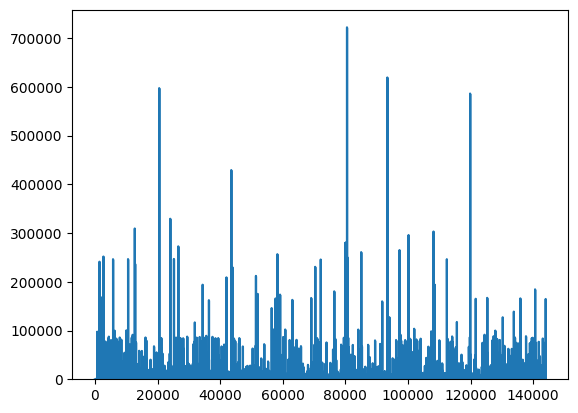

In [18]:
df['Duration'].plot(kind = 'area')

Does this plot give any insights?

Select subsections of the data to make plots that provide more insights.

The Product Team would like all of the station names to be lower case and  with `_` as a separator

`South Van Ness at Market` -> `south_van_ness_at_market`  

**DO NOT USE A FOR LOOP. THEY ARE THE 👿**

In [19]:
df['Start_Station'] = df['Start_Station'].str.replace(' ','_')

In [20]:
df['End_Station'] = df['End_Station'].str.replace(' ','_')

In [21]:
df.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
0,4576,63,8/29/2013 14:13,South_Van_Ness_at_Market,66,8/29/2013 14:14,South_Van_Ness_at_Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San_Jose_City_Hall,10,8/29/2013 14:43,San_Jose_City_Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain_View_City_Hall,27,8/29/2013 10:17,Mountain_View_City_Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San_Jose_City_Hall,10,8/29/2013 11:30,San_Jose_City_Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South_Van_Ness_at_Market,66,8/29/2013 12:04,Market_at_10th,67,319,Subscriber,94103


Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypotheses…
> Time boxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes. 

In [ ]:
import time

class Stopwatch:
    def __init__(self):
        self.start_time = None
        self.end_time = None

    def usage(self):
        print("\n----------- STOPWATCH -----------")
        print("|-> s      : start the stopwatch |")
        print("|-> Ctrl+C : stop the stopwatch  |")
        print("----------- STOPWATCH -----------")

    def start(self):
        self.start_time = time.time()

    def start_countdown(self, seconds_countdown=3):
        user_input = input("\n-> Press 's' when you're ready to start: ")
        while seconds_countdown > 0:
            print(f"\rStarting in {seconds_countdown}...", end="")
            time.sleep(1)
            seconds_countdown -= 1
        print("\rGO !", end="")

    def stop(self):
        self.end_time = time.time()
        print(f"\n\nTotal elapsed time: {(self.end_time - self.start_time):.3f} seconds\n")
        exit(0)

    def run(self):
        self.usage()
        self.start_countdown()
        self.start()
        try:
            while True:
                print(f"\rElapsed time: {(time.time() - self.start_time):.0f} seconds", end="")
                time.sleep(1)
        except KeyboardInterrupt:
            self.stop()

if __name__ == "__main__":
    stopwatch = Stopwatch()
    stopwatch.run()


----------- STOPWATCH -----------
|-> s      : start the stopwatch |
|-> Ctrl+C : stop the stopwatch  |
----------- STOPWATCH -----------
